In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [2]:
iris_data = load_iris() # load the iris dataset

In [4]:
print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


In [5]:
# Convert data to a single column
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) 

In [6]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)


In [7]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [8]:
# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))


In [9]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print('Neural Network Model Summary: ')
print(model.summary())


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Train the model
#hist=model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200,validation_data=(test_x,test_y))
history = model.fit(train_x, train_y, epochs=200, batch_size=32, verbose=2,validation_data=(test_x,test_y))

Epoch 1/200
4/4 - 0s - loss: 0.0453 - accuracy: 0.9833 - val_loss: 9.4663e-04 - val_accuracy: 1.0000
Epoch 2/200
4/4 - 0s - loss: 0.0451 - accuracy: 0.9833 - val_loss: 9.2023e-04 - val_accuracy: 1.0000
Epoch 3/200
4/4 - 0s - loss: 0.0454 - accuracy: 0.9833 - val_loss: 9.0367e-04 - val_accuracy: 1.0000
Epoch 4/200
4/4 - 0s - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/200
4/4 - 0s - loss: 0.0461 - accuracy: 0.9833 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/200
4/4 - 0s - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/200
4/4 - 0s - loss: 0.0472 - accuracy: 0.9833 - val_loss: 9.1924e-04 - val_accuracy: 1.0000
Epoch 8/200
4/4 - 0s - loss: 0.0453 - accuracy: 0.9833 - val_loss: 9.2071e-04 - val_accuracy: 1.0000
Epoch 9/200
4/4 - 0s - loss: 0.0448 - accuracy: 0.9833 - val_loss: 9.8972e-04 - val_accuracy: 1.0000
Epoch 10/200
4/4 - 0s - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch

In [38]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


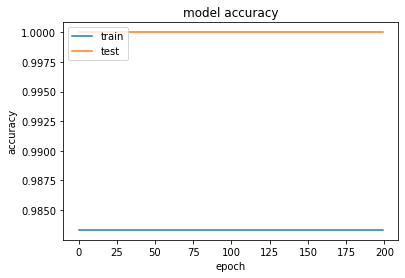

In [39]:
# Plot accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

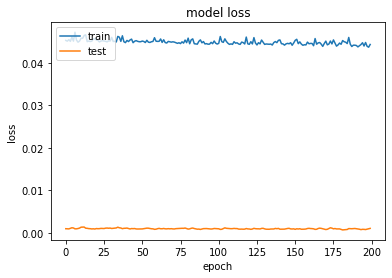

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 1.0000


In [42]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.001023
Final test set accuracy: 1.000000
